In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data structure (you'll replace with your actual measurements)
metrics = {
    'Platforms': ['Full-Model (GPU)', 'TFLite Model (GPU)', 'Full-Model (CPU)','TFLite Model (CPU)', 'ArduinoNanoBLE(Est.)'],
    'Inference Time (ms)': [7.5, 63.7, 25.7, 184.6, 511.48]
}


metrics2 = {
    'Platforms': ['Full Model', 'TFLite Model', 'Arduino (TFLite Micro)'],
    'Memory Usage (MB)': [10.87, round(2970.2/1024, 2), round(148.5/1024, 2)],  # Example values
    'Power Consumption (W)': [150, 50, 0.003],  # Example values
    'Accuracy (%)': [99, 97, 89]  # Example values
}

df = pd.DataFrame(metrics)
DF2 = pd.DataFrame(metrics2)

<Figure size 800x550 with 0 Axes>

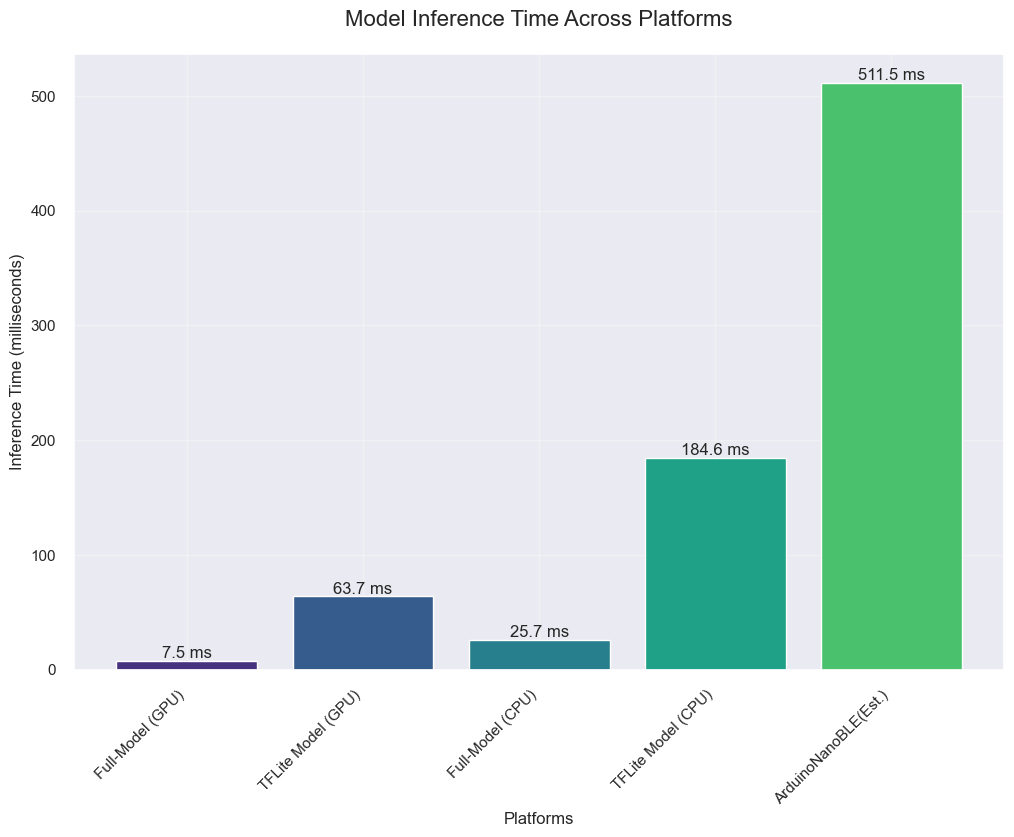

In [5]:

# Set style correctly
plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid'
sns.set_theme()
colors = sns.color_palette('viridis')

# Clear any existing plots
plt.clf()


# 1. Inference Time - Lollipop Chart
# 1. Inference Time Comparison with gradient colors
plt.figure(figsize=(12, 8))
inference_bars = plt.bar(df['Platforms'], df['Inference Time (ms)'], 
                        color=colors)
plt.title('Model Inference Time Across Platforms', 
          fontsize=16, pad=20)
plt.xlabel('Platforms', fontsize=12)
plt.ylabel('Inference Time (milliseconds)', fontsize=12)

# Add value labels and error bars
for bar in inference_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} ms',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.savefig('inference_time_comparisonBAR.png', dpi=300, bbox_inches='tight')
plt.show()

# # 2. Memory Usage - Bubble Plot
# plt.figure(figsize=(12, 8))
# sizes = DF2['Memory Usage (MB)'] * 1000  # Scale up for visibility

# # Use only the first 3 colors from the palette or a single color
# colors_subset = colors[:len(DF2['Platforms'])]  # Take only needed colors
# # OR use a single color:
# # colors_subset = '#1f77b4'  # Single blue color

# plt.scatter(range(len(DF2['Platforms'])), DF2['Memory Usage (MB)'], 
#            s=sizes, alpha=0.6, c=colors_subset)
# plt.yscale('log')

# plt.title('Memory Usage Comparison', fontsize=16, pad=20)
# plt.xlabel('Platforms', fontsize=12)
# plt.ylabel('Memory Usage (MB) - Log Scale', fontsize=12)

# # Add labels
# for i, (platform, value) in enumerate(zip(DF2['Platforms'], DF2['Memory Usage (MB)'])):
#     plt.text(i, value*1.2, f'{value:.3f} MB', ha='center', va='bottom')

# plt.grid(True, which="both", alpha=0.3)
# plt.xticks(range(len(DF2['Platforms'])), DF2['Platforms'], rotation=45, ha='right')
# plt.ylim(0.1, plt.ylim()[1])
# plt.savefig('memory_usage_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()

# # 3. Power Consumption - Radar Chart
# plt.figure(figsize=(10, 10))
# angles = np.linspace(0, 2*np.pi, len(DF2['Platforms']), endpoint=False)
# values = DF2['Power Consumption (W)'].values
# values = np.concatenate((values, [values[0]]))  # Complete the circle
# angles = np.concatenate((angles, [angles[0]]))  # Complete the circle

# ax = plt.subplot(111, projection='polar')
# ax.plot(angles, values, 'o-', linewidth=2)
# ax.fill(angles, values, alpha=0.25)
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(DF2['Platforms'])

# plt.title('Power Consumption Analysis', fontsize=16, pad=20)
# for angle, value in zip(angles[:-1], values[:-1]):
#     plt.text(angle, value*1.2, f'{value:.2f}W', ha='center', va='bottom')

# plt.savefig('power_consumption_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()

# # 4. Accuracy - Horizontal Range Plot with Confidence Intervals
# plt.figure(figsize=(12, 8))
# confidence_interval = 5  # Assuming 5% confidence interval

# plt.hlines(y=range(len(DF2['Platforms'])), 
#           xmin=DF2['Accuracy (%)'] - confidence_interval,
#           xmax=DF2['Accuracy (%)'] + confidence_interval,
#           color=colors, alpha=0.7)
# plt.plot(DF2['Accuracy (%)'], range(len(DF2['Platforms'])), 
#          'o', color=colors[-2], markersize=12)

# plt.axvline(x=90, color='r', linestyle='--', alpha=0.5, 
#             label='Acceptable Threshold (90%)')

# plt.title('Model Accuracy with Confidence Intervals', fontsize=16, pad=20)
# plt.xlabel('Accuracy (%)', fontsize=12)
# plt.ylabel('Platforms', fontsize=12)

# # Add value labels
# for i, value in enumerate(DF2['Accuracy (%)']):
#     plt.text(value+confidence_interval+1, i, f'{value}%', 
#              va='center')

# plt.grid(True, alpha=0.3)
# plt.xlim(0, 100)
# plt.legend()
# plt.yticks(range(len(DF2['Platforms'])), DF2['Platforms'])
# plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14936\1681463165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platforms', y='Inference Time (ms)', data=df, palette='viridis')


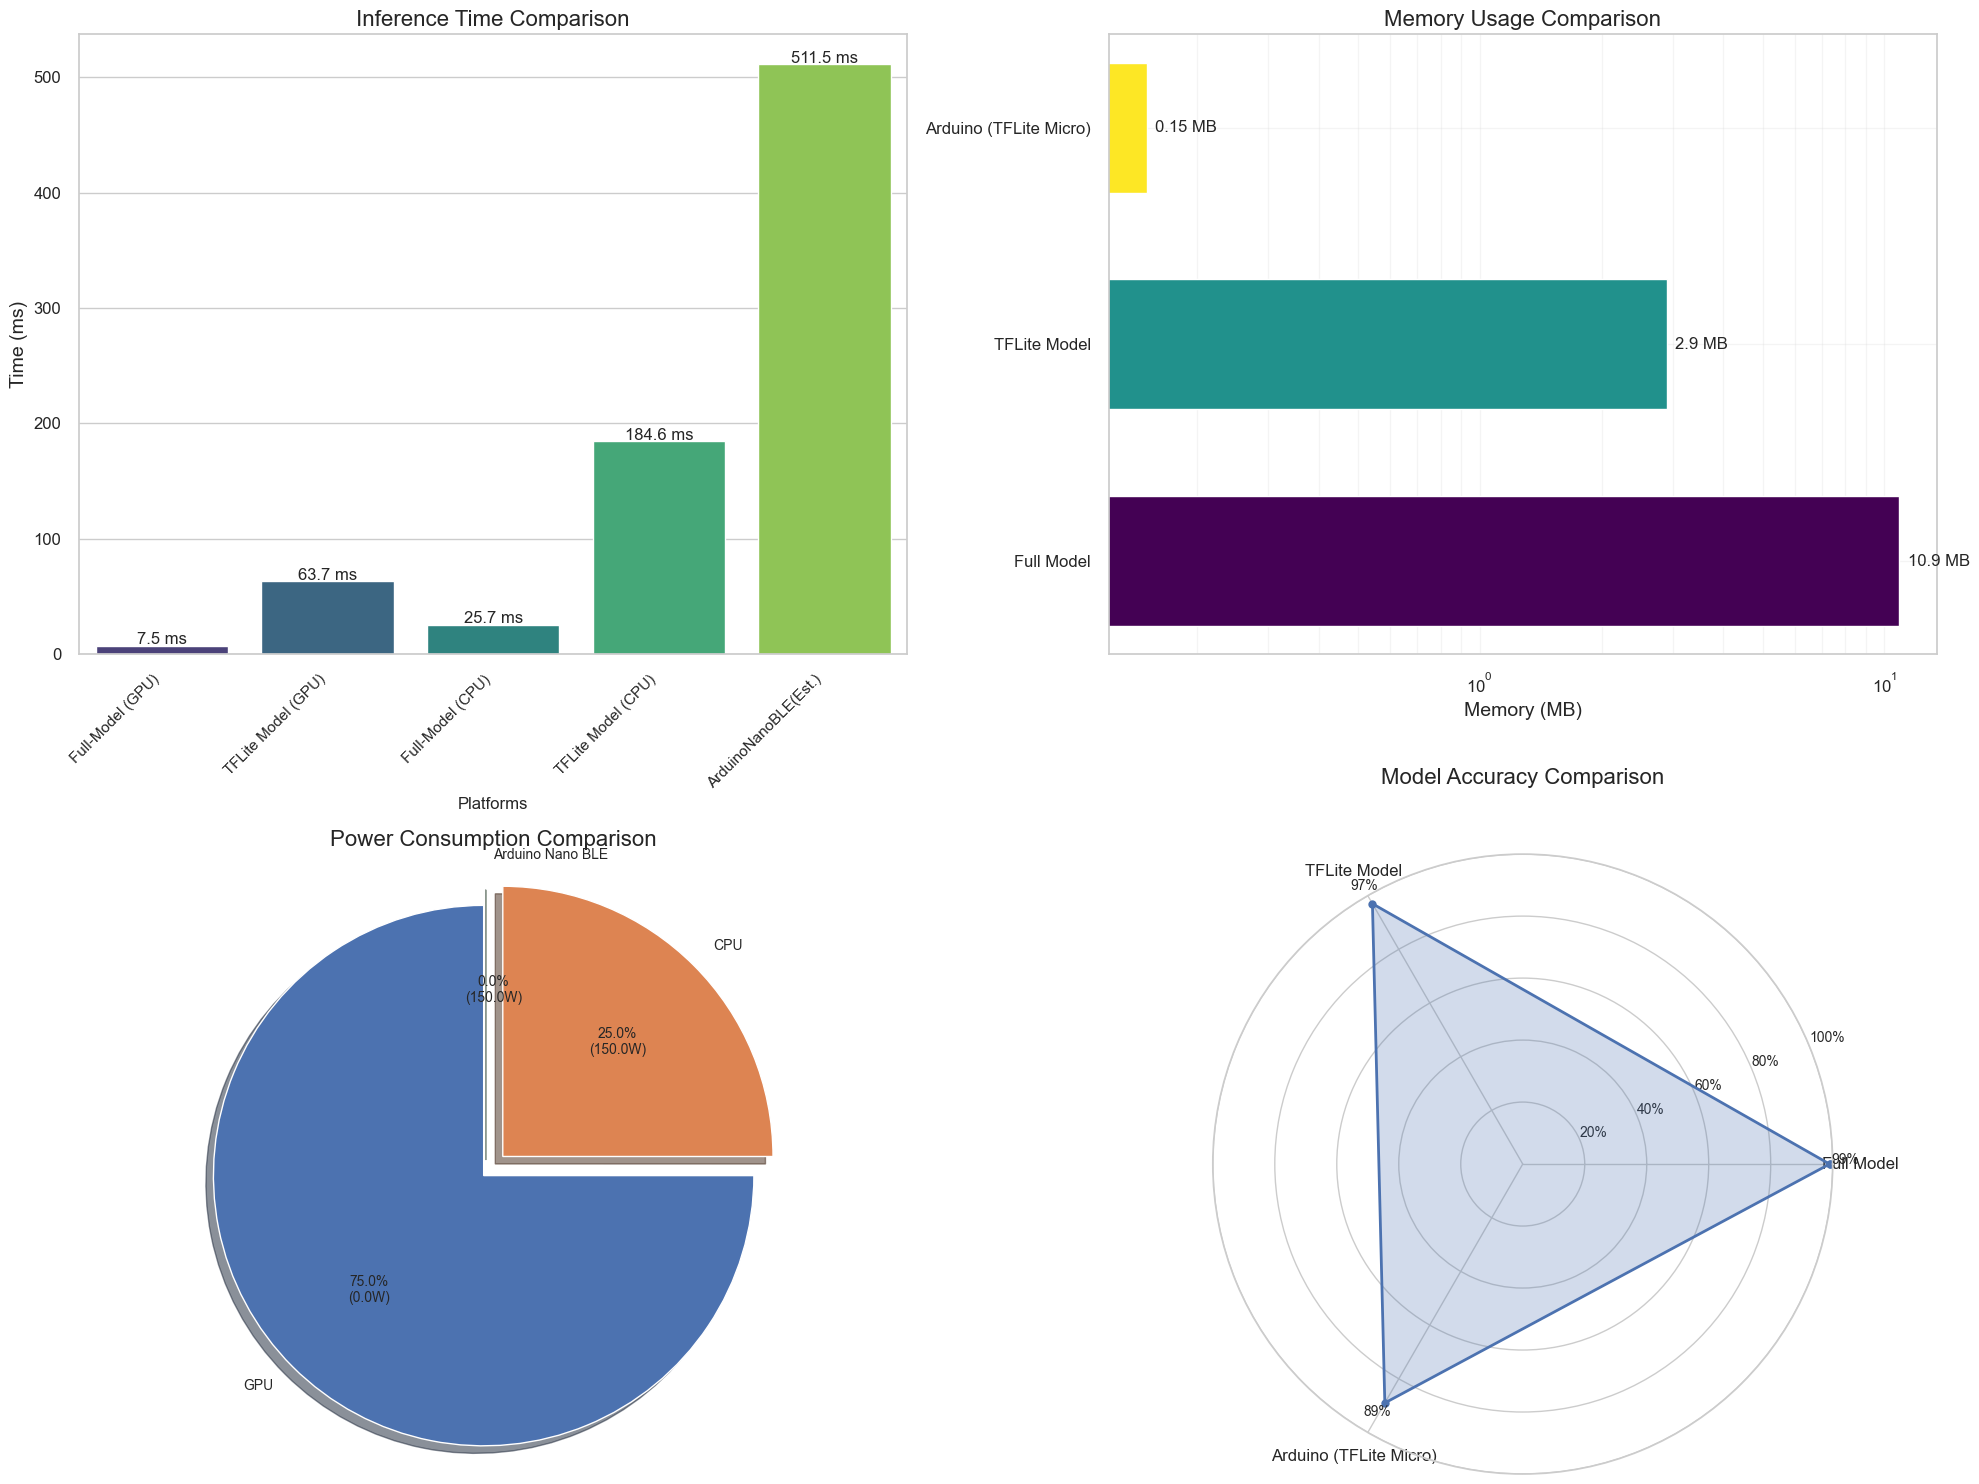

In [14]:
# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# 1. Inference Time Comparison (keeping as bar plot)
plt.subplot(2, 2, 1)
sns.barplot(x='Platforms', y='Inference Time (ms)', data=df, palette='viridis')
plt.title('Inference Time Comparison', fontsize=16)
plt.ylabel('Time (ms)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=12)

for i, v in enumerate(df['Inference Time (ms)']):
    plt.text(i, v + 1, f"{v:.1f} ms", ha='center')

# 2. Memory Usage Comparison (changing to horizontal lollipop plot)
# plt.subplot(2, 2, 2)
# plt.title('Memory Usage Comparison', fontsize=16)
# plt.xlabel('Memory (MB)', fontsize=14)
# plt.yscale('log')  # Log scale for better comparison
# plt.xscale('log')  # Log scale for x-axis too for better visualization

# # Sort platforms by memory usage for better visualization
# sorted_indices = DF2['Memory Usage (MB)'].argsort()
# sorted_platforms = DF2['Platforms'].iloc[sorted_indices]
# sorted_memory = DF2['Memory Usage (MB)'].iloc[sorted_indices]

# # Create horizontal lollipop plot
# plt.hlines(y=range(len(sorted_platforms)), xmin=0, xmax=sorted_memory, color='skyblue', alpha=0.7, linewidth=2)
# plt.plot(sorted_memory, range(len(sorted_platforms)), "o", markersize=10, color='blue', alpha=0.7)

# # Add platform labels
# plt.yticks(range(len(sorted_platforms)), sorted_platforms, fontsize=12)
# plt.xticks(fontsize=12)

# # Add value labels
# for i, value in enumerate(sorted_memory):
#     plt.text(value*1.1, i, f'{value} MB', va='center', fontsize=10)

# 2. Memory Usage Comparison (improved lollipop to bubble chart)
# plt.subplot(2, 2, 2)
# plt.title('Memory Usage Comparison', fontsize=16)
# plt.xlabel('Memory (MB)', fontsize=14)

# # Sort data for better visualization
# sorted_indices = DF2['Memory Usage (MB)'].argsort()[::-1]  # Descending order
# sorted_platforms = DF2['Platforms'].iloc[sorted_indices]
# sorted_memory = DF2['Memory Usage (MB)'].iloc[sorted_indices]

# # Create horizontal dotplot/bubbleplot
# # Calculate y positions with less spacing
# y_pos = np.arange(len(sorted_platforms))
# plt.scatter(sorted_memory, y_pos, s=sorted_memory*30, alpha=0.7, c=sorted_memory, cmap='viridis')

# # Add connecting lines from zero
# plt.hlines(y=y_pos, xmin=0, xmax=sorted_memory, color='skyblue', alpha=0.5, linewidth=1.5)

# # Add platform labels
# plt.yticks(y_pos, sorted_platforms, fontsize=12)

# # Adjust axes for better visualization
# if min(sorted_memory) < 1:
#     plt.xscale('log')  # Use log scale only if there are very small values
#     plt.grid(True, which="both", ls="-", alpha=0.2)
# else:
#     plt.grid(True, alpha=0.2)
#     plt.xlim(0, max(sorted_memory) * 1.2)  # Add some padding

# # Add value labels
# for i, value in enumerate(sorted_memory):
#     if value < 1:
#         plt.text(value*1.2, y_pos[i], f'{value:.2f} MB', va='center', fontsize=10)
#     else:
#         plt.text(value*1.05, y_pos[i], f'{value:.1f} MB', va='center', fontsize=10)

# 2. Memory Usage Comparison (changing to horizontal bar chart with gradient)
plt.subplot(2, 2, 2)
plt.title('Memory Usage Comparison', fontsize=16)
plt.xlabel('Memory (MB)', fontsize=14)

# Sort platforms by memory usage for better visualization
sorted_indices = DF2['Memory Usage (MB)'].argsort()[::-1]  # Descending order
sorted_platforms = DF2['Platforms'].iloc[sorted_indices]
sorted_memory = DF2['Memory Usage (MB)'].iloc[sorted_indices]

# Create horizontal bars with color gradient
bars = plt.barh(sorted_platforms, sorted_memory, height=0.6, 
                color=plt.cm.viridis(np.linspace(0, 1, len(sorted_platforms))))

# Add value labels at the end of each bar
for bar, value in zip(bars, sorted_memory):
    plt.text(value * 1.05, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f} MB' if value < 1 else f'{value:.1f} MB', 
             va='center', fontsize=12)

# Adjust axes for better visualization
if min(sorted_memory) < 1:
    plt.xscale('log')  # Use log scale only if there are very small values
    plt.grid(True, which="both", ls="-", alpha=0.2)
else:
    plt.grid(True, alpha=0.2)
    plt.xlim(0, max(sorted_memory) * 1.2)  # Add some padding

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# 3. Power Consumption Comparison (changing to pie chart)
plt.subplot(2, 2, 3)
plt.title('Power Consumption Comparison', fontsize=16)

# Calculate percentage for better representation in pie chart
total_power = DF2['Power Consumption (W)'].sum()
power_percentages = DF2['Power Consumption (W)'] / total_power * 100

# Create pie chart
plt.pie(DF2['Power Consumption (W)'], 
        labels=['GPU', 'CPU', 'Arduino Nano BLE'], 
        autopct=lambda p: f'{p:.1f}%\n({DF2["Power Consumption (W)"][int(p*len(DF2)/100)]:.1f}W)',
        startangle=90, 
        shadow=True, 
        explode=[0.05] * len(DF2),
        textprops={'fontsize': 10})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# 4. Accuracy Comparison (changing to polar chart)
plt.subplot(2, 2, 4, polar=True)
plt.title('Model Accuracy Comparison', fontsize=16, y=1.1)

# Get number of platforms
N = len(DF2['Platforms'])
# Compute angles for each platform (in radians)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
# Make the plot a full circle by repeating the first value
values = DF2['Accuracy (%)'].tolist()
angles += angles[:1]
values += values[:1]

# Draw the plot
plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)

# Add platforms as labels
plt.xticks(angles[:-1], DF2['Platforms'], fontsize=12)
plt.yticks([20, 40, 60, 80, 100], ['20%', '40%', '60%', '80%', '100%'], fontsize=10)
plt.ylim(0, 100)

# Add value labels
for i, (angle, value) in enumerate(zip(angles[:-1], values[:-1])):
    plt.text(angle, value+5, f'{value}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('mixed_visualization_comparison5.png')
plt.show()